In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le jeu de données
file_path = 'pet_adoption_data.csv'  # Mettez à jour le chemin si nécessaire
data = pd.read_csv(file_path)

# Étape 1 : Nettoyer les données (pour simplifier, nous supprimons les lignes avec des valeurs manquantes)
data_cleaned = data.dropna()
print("Étape 1 : Données nettoyées")
print(data_cleaned.head())

Étape 1 : Données nettoyées
   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0   

In [2]:
# Étape 2 : Sélectionner les caractéristiques (features) et la variable cible
X = data_cleaned.drop(columns=['AdoptionLikelihood'])
y = data_cleaned['AdoptionLikelihood']
print("\nÉtape 2 : Caractéristiques sélectionnées")
print("X (caractéristiques) :")
print(X.head())
print("y (variable cible) :")
print(y.head())


Étape 2 : Caractéristiques sélectionnées
X (caractéristiques) :
   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  
0           1                0                 27          140              0  
1           0                0                  8          235              0  
2           0                0                 85          385              0  
3           0                0                 61          217              1  
4           0                0                 28           14              1 

In [3]:
# Encodage des variables catégorielles avec pd.get_dummies()
X_encoded = pd.get_dummies(X)
print("\nEncodage des variables catégorielles terminé.")
print(X_encoded.head())  # Affiche les 5 premières lignes des données encodées


Encodage des variables catégorielles terminé.
   PetID  AgeMonths   WeightKg  Vaccinated  HealthCondition  \
0    500        131   5.039768           1                0   
1    501         73  16.086727           0                0   
2    502        136   2.076286           0                0   
3    503         97   3.339423           0                0   
4    504        123  20.498100           0                0   

   TimeInShelterDays  AdoptionFee  PreviousOwner  PetType_Bird  PetType_Cat  \
0                 27          140              0          True        False   
1                  8          235              0         False        False   
2                 85          385              0         False        False   
3                 61          217              1          True        False   
4                 28           14              1         False        False   

   ...  Breed_Rabbit  Breed_Siamese  Color_Black  Color_Brown  Color_Gray  \
0  ...         False  

In [4]:
# Étape 3 : Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print("\nÉtape 3 : Données divisées")
print("Ensemble d'entraînement :")
print(X_train.shape)
print("Ensemble de test :")
print(X_test.shape)


Étape 3 : Données divisées
Ensemble d'entraînement :
(1605, 27)
Ensemble de test :
(402, 27)


In [5]:
# Étape 4 : Entraîner le modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nÉtape 4 : Modèle entraîné")


Étape 4 : Modèle entraîné


In [6]:
# Étape 5 : Prédire sur l'ensemble de test
y_pred = model.predict(X_test)
print("\nÉtape 5 : Prédictions effectuées")
print(y_pred[:10])  # Affiche les 10 premières prédictions


Étape 5 : Prédictions effectuées
[1 0 0 0 0 1 1 0 0 0]


In [7]:
# Étape 6 : Évaluer le modèle avec la matrice de confusion et le rapport de classification
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("\nÉtape 6 : Évaluation du modèle")
print("Matrice de confusion :")
print(conf_matrix)
print("\nRapport de classification :")
print(report)


Étape 6 : Évaluation du modèle
Matrice de confusion :
[[259  11]
 [ 11 121]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       270
           1       0.92      0.92      0.92       132

    accuracy                           0.95       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.95      0.95      0.95       402



In [8]:
# Étape 7 : Analyser l'importance des caractéristiques
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'Caractéristique': X_encoded.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print("\nÉtape 7 : Importance des caractéristiques")
print(feature_importances_df)


Étape 7 : Importance des caractéristiques
           Caractéristique  Importance
25             Size_Medium    0.155062
1                AgeMonths    0.140616
3               Vaccinated    0.124564
0                    PetID    0.107926
4          HealthCondition    0.092719
13          Breed_Labrador    0.060731
6              AdoptionFee    0.047769
2                 WeightKg    0.045952
24              Size_Large    0.045439
5        TimeInShelterDays    0.043431
26              Size_Small    0.042882
10             PetType_Dog    0.015640
7            PreviousOwner    0.007401
19             Color_Black    0.006866
22            Color_Orange    0.006765
23             Color_White    0.006148
21              Color_Gray    0.005864
16            Breed_Poodle    0.005644
20             Color_Brown    0.005419
12  Breed_Golden Retriever    0.005347
8             PetType_Bird    0.004161
9              PetType_Cat    0.004160
11          PetType_Rabbit    0.004137
14          Breed_Par

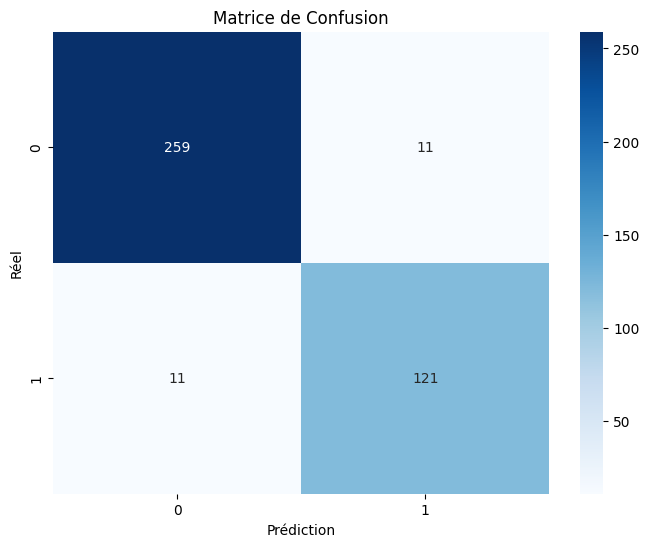

In [9]:
# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.show()